In [1]:
import numpy as np
import pandas as pd
import cv2
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image,ImageDraw,ImageEnhance
import imutils
import random

In [2]:
with open ('cat_dog_annotations.json') as cat_dog:
    val=cat_dog.read()

In [3]:
json=json.loads(val)

In [4]:
json_dict=json["_via_img_metadata"].values()

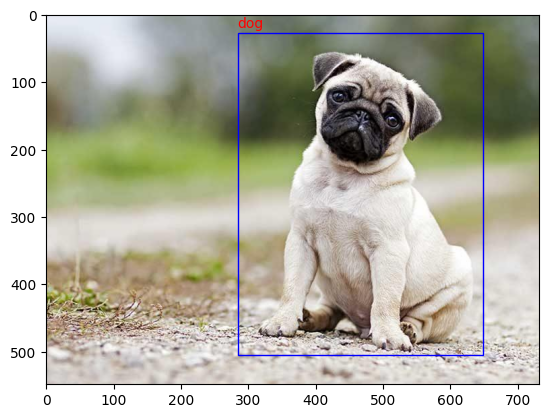

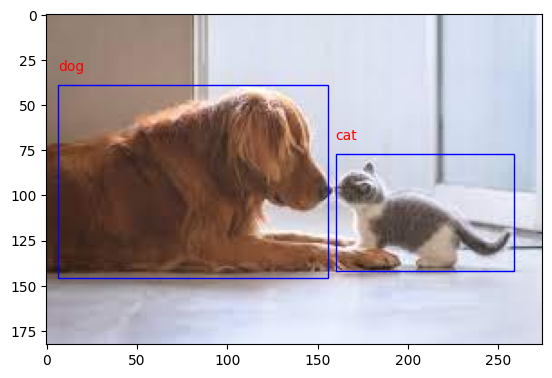

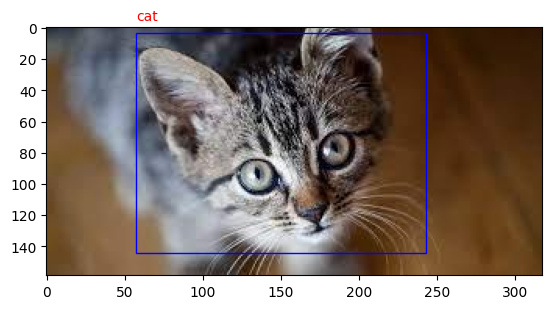

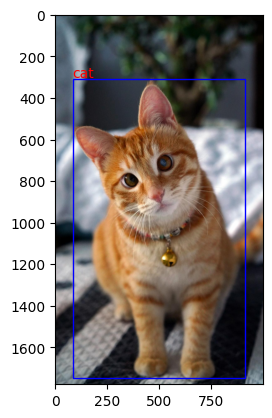

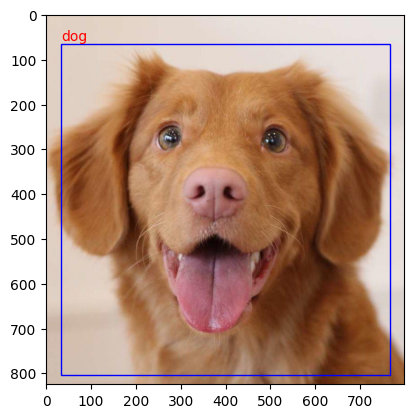

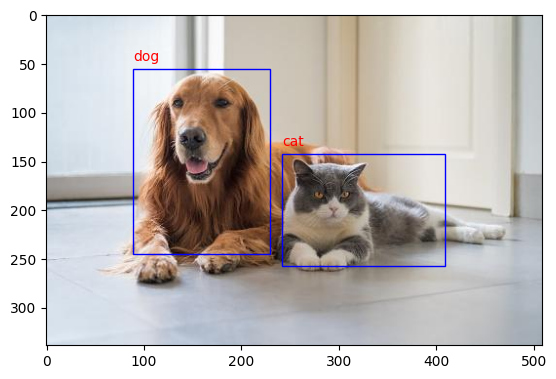

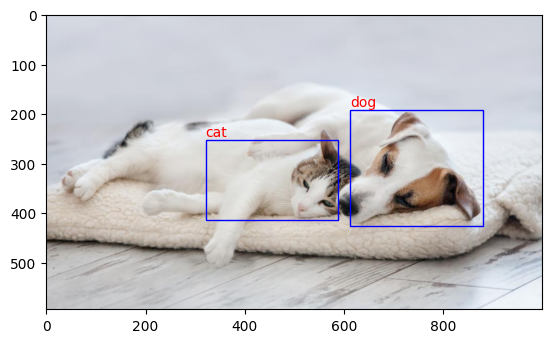

In [5]:

for image in json_dict:
   
    fn=image['filename']
    img=Image.open(fn)
    fig,ax = plt.subplots()
    ax.imshow(img)

    for region in image['regions']:
        
    
 #extract x,y,w,h from region {shape_attributes}   
        x =  region['shape_attributes']['x']
        y = region['shape_attributes']['y']

        w = region['shape_attributes']['width']

        h = region['shape_attributes']['height']

#extract label name from region {region_attributes{class}}  

        label=list(region["region_attributes"]["class"].keys())[0]

        plt.text(x, y-8, label, color='r')
        
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='b', facecolor='none')

        ax.add_patch(rect)

In [ ]:
# from PIL import Image, ImageDraw
# import imutils
# import matplotlib.pyplot as plt
# import numpy as np
output_dir='rotate_all/'
for i, image in enumerate(json_dict):
    fn = image['filename']
    img = Image.open(fn)
    draw = ImageDraw.Draw(img)

    for region in image['regions']:
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        w = region['shape_attributes']['width']
        h = region['shape_attributes']['height']
        label = list(region["region_attributes"]["class"].keys())[0]

        draw.rectangle((x, y, x + w, y + h), outline='blue')
        draw.text((x, y - 8), label, fill='red')

    img_array = np.array(img)
    resized_array = imutils.resize(img_array, width=400)
    resized = Image.fromarray(resized_array)
    
    brightness = random.uniform(1, 2)
    enhancer = ImageEnhance.Brightness(resized)
    img_mod = enhancer.enhance(brightness)
    img_array_2 = np.array(img_mod)


    for angle in range(0, 360,5):
        angled_img = imutils.rotate_bound(img_array_2, angle)
        file_name = f"rotate_img_{i}_{angle}.jpeg"
        angled_img_pil = Image.fromarray(angled_img)
        angled_img_pil.save(os.path.join(output_dir, file_name))

#         plt.imshow(angled_img)
#         plt.show()
